# About data

* **survival** - Survival (0 - No, 1 - Yes)
* **pclass** - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* **sex** - Sex
* **Age** - Age in years
* **sibsp** - # of siblings / spouses aboard the Titanic
* **parch** - # of parents / children aboard the Titanic 
* **ticket** - Ticket number
* **fare** - Passenger fare
* **cabin** - Cabin number
* **embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**pclass**: A proxy for socio-economic status (SES) \
1st = Upper \
2nd = Middle \
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way... \
Sibling = brother, sister, stepbrother, stepsister \
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way... \
Parent = mother, father \
Child = daughter, son, stepdaughter, stepson \
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import LabelEncoder

# EDA

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_null = train.isnull().sum()
train_null[train_null > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
test_null = test.isnull().sum()
test_null[test_null > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

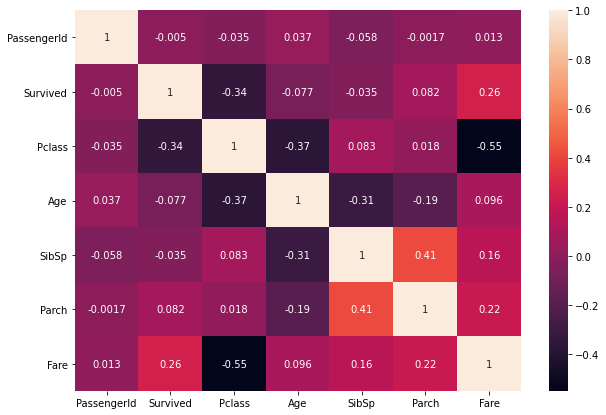

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(train.corr(), annot=True)
plt.show()

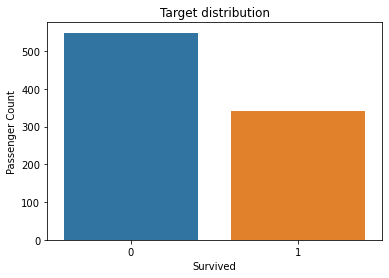

In [10]:
plt.figure()
sns.countplot(data=train, x='Survived')
plt.title('Target distribution')
plt.ylabel('Passenger Count')
plt.show()

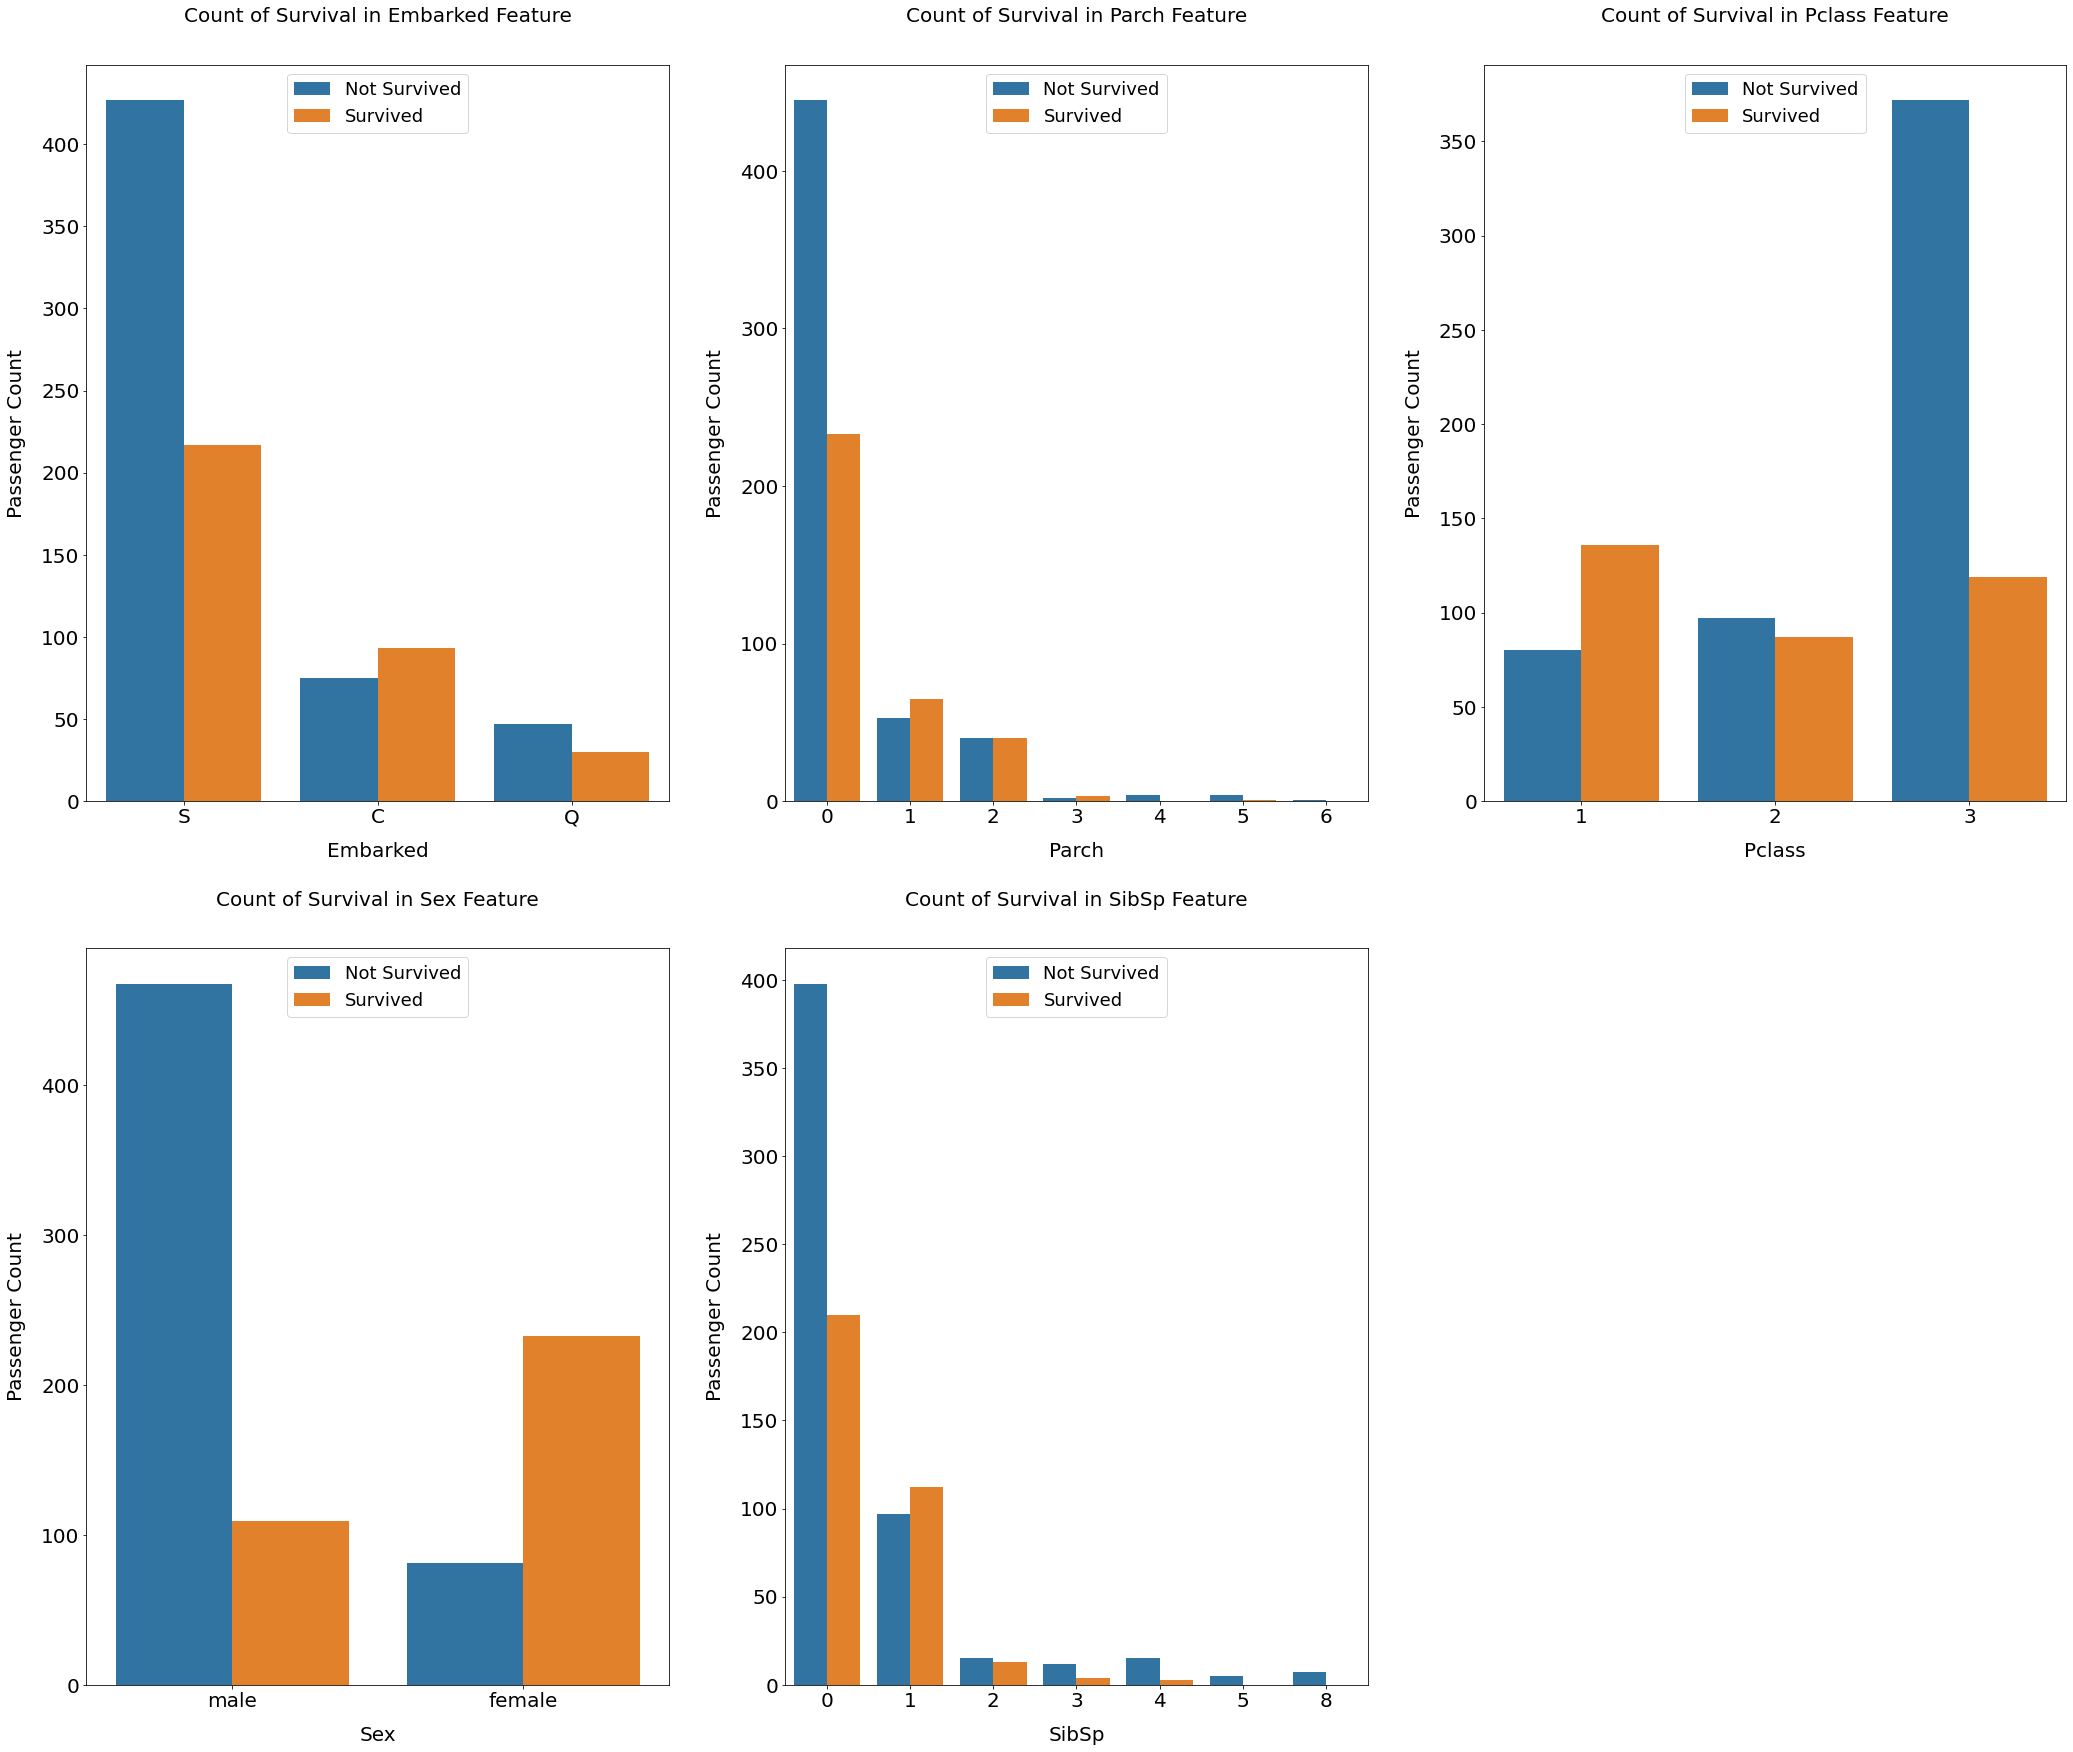

In [11]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

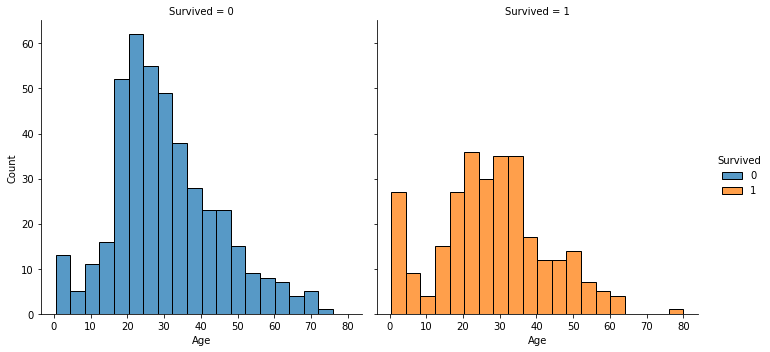

In [12]:
sns.displot(data=train, x='Age', hue='Survived', col='Survived')

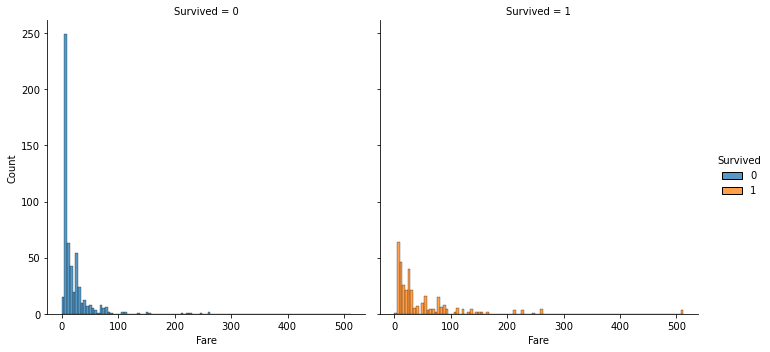

In [13]:
sns.displot(data=train, x='Fare', hue='Survived', col='Survived')

# Data preprocessing

## Filling NaN values

In [14]:
merged_df = pd.concat([train, test], ignore_index=True)
merged_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


First of all, we will fill NaN values in "Age" column. We will not use median value of age of all passengers. Instead of this, we will group passengers by "Pclass" feature and take a look at median value of age in each group.

In [15]:
merged_df.groupby('Pclass').agg('median')['Age'].to_frame()

,Age
Pclass,
1,39.0
2,29.0
3,24.0


In [16]:
merged_df['Age'] = merged_df.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.median()))

Next, we will fill NaN values in "Fare" column. Again, we will not use median values of fare of all passengers. We have one passenger with NaN values in "Fare", so let's take a look at him in dataset.

In [17]:
merged_df[merged_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


So, let's get median value of passengers with same values of "Pclass".

In [18]:
median_fare_of_p3 = merged_df[(merged_df['Pclass'] == 3)]['Fare'].median()
median_fare_of_p3

8.05

In [19]:
# median values of "Fare" of all passengers
merged_df['Fare'].median()

14.4542

As we see, these median values different from each other almost twice!

In [20]:
merged_df['Fare'].fillna(median_fare_of_p3, inplace=True)

In [21]:
# simplest way
merged_df['Embarked'].fillna(merged_df['Embarked'].mode()[0], inplace=True)

We will delete the "Cabin" feature, because there is a lot of data missing in it.

In [22]:
merged_df.drop('Cabin', axis=1, inplace=True)

We alse delete the "Ticket" feature.

In [23]:
merged_df.drop('Ticket', axis=1, inplace=True)

In [24]:
merged_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

Great, there are no more NaN values (there are NaN in the "Survived", because there is no such column in the test dataset).

## Feature engineering

In [25]:
merged_df['Age'] = pd.qcut(merged_df['Age'], 10, duplicates='drop')
merged_df['Fare'] = pd.qcut(merged_df['Fare'], 10, duplicates='drop')

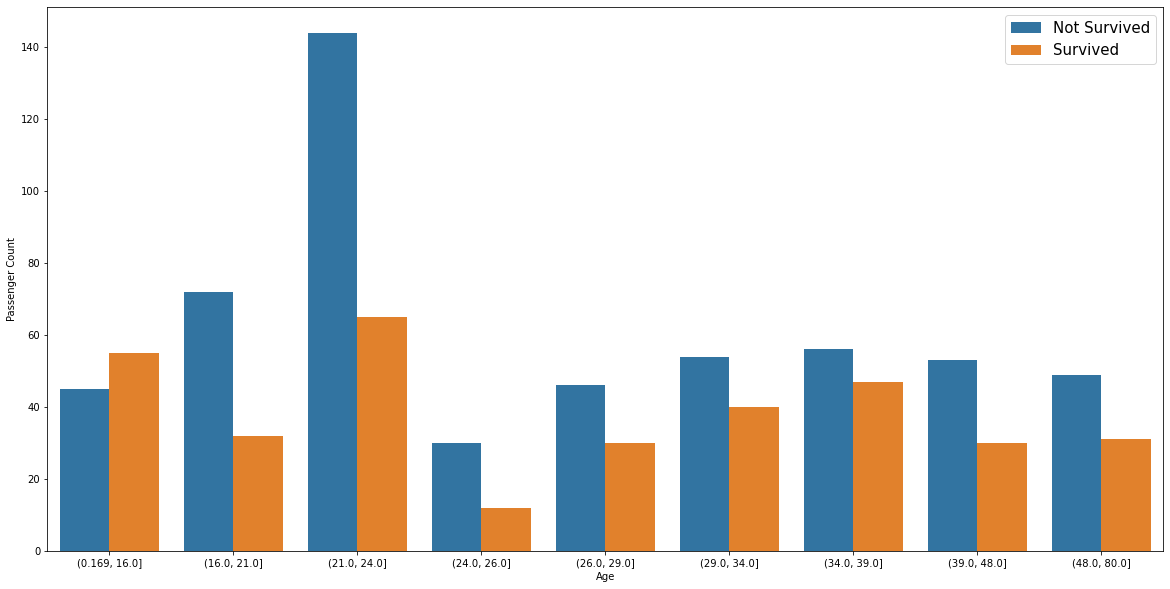

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(data=merged_df, x='Age', hue='Survived')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.ylabel('Passenger Count')
plt.show()

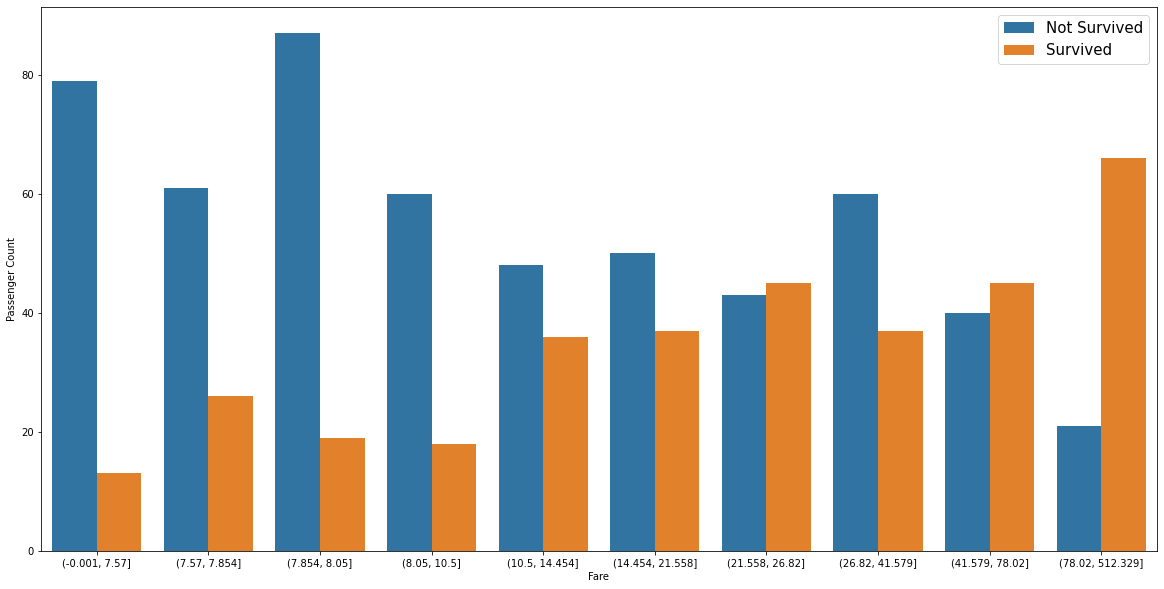

In [27]:
plt.figure(figsize=(20, 10))
sns.countplot(data=merged_df, x='Fare', hue='Survived')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.ylabel('Passenger Count')
plt.show()

At the very beginning, we saw a significant correlation of features "SibSp" and "Parch". So let's create the attribute "Family_Size".

In [28]:
merged_df['Family_Size'] = merged_df['SibSp'] + merged_df['Parch'] + 1

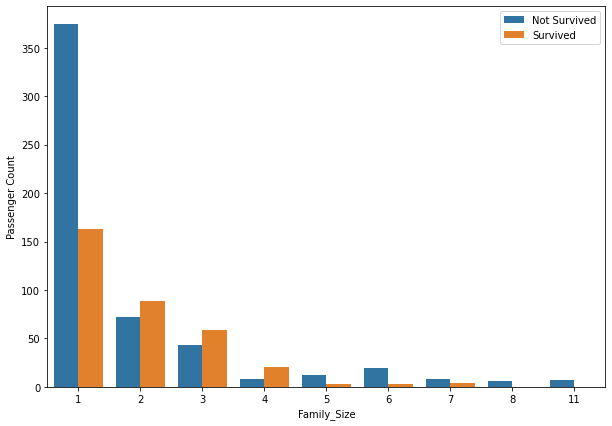

In [29]:
plt.figure(figsize=(10, 7))
sns.countplot(data=merged_df, x='Family_Size', hue='Survived')
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.ylabel('Passenger Count')
plt.show()

In [30]:
family_map = {1: 'Alone', 
              2: 'Small', 
              3: 'Small', 
              4: 'Small', 
              5: 'Medium', 
              6: 'Medium', 
              7: 'Large', 
              8: 'Large', 
              11: 'Large'}
merged_df['Family_Size'] = merged_df['Family_Size'].map(family_map)

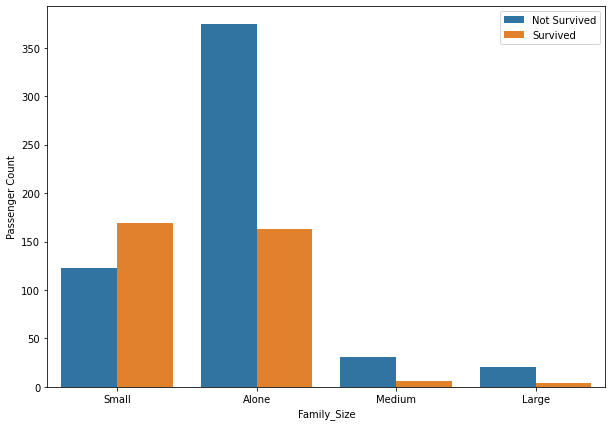

In [31]:
plt.figure(figsize=(10, 7))
sns.countplot(data=merged_df, x='Family_Size', hue='Survived')
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.ylabel('Passenger Count')
plt.show()

In [32]:
merged_df['Title'] = merged_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

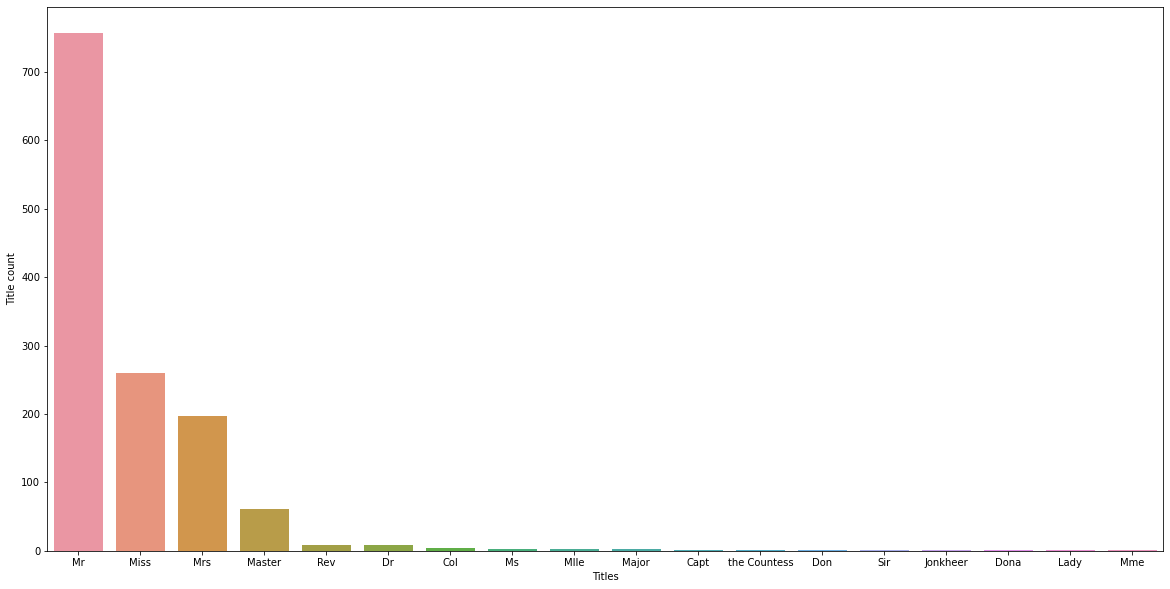

In [33]:
plt.figure(figsize=(20, 10))
sns.barplot(x=merged_df['Title'].value_counts().index, y=merged_df['Title'].value_counts().values)
plt.xlabel('Titles')
plt.ylabel('Title count')
plt.show()

In [34]:
merged_df['Title'] = merged_df['Title'].replace(['Miss', 'Mlle', ], 'Ms')
merged_df['Title'] = merged_df['Title'].replace(['Mme', 'Lady','the Countess', 'Dona'], 'Mrs')
merged_df['Title'] = merged_df['Title'] \
    .replace(['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt','Jonkheer'], 'Other Important')

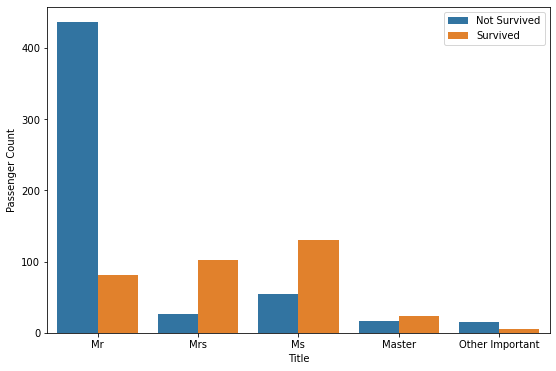

In [35]:
plt.figure(figsize=(9, 6))
sns.countplot(data=merged_df, x='Title', hue='Survived')
plt.xlabel('Title')
plt.ylabel('Passenger Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [36]:
train = merged_df[:len(train)].copy()
test = merged_df[len(train):].copy()

In [37]:
train['Survived'] = train['Survived'].astype(int)
test.drop('Survived', axis=1, inplace=True)

In [38]:
train.shape, test.shape

((891, 12), (418, 11))

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,"(21.0, 24.0]",1,0,"(-0.001, 7.57]",S,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 39.0]",1,0,"(41.579, 78.02]",C,Small,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,"(24.0, 26.0]",0,0,"(7.854, 8.05]",S,Alone,Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 39.0]",1,0,"(41.579, 78.02]",S,Small,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,"(34.0, 39.0]",0,0,"(7.854, 8.05]",S,Alone,Mr


In [40]:
train['Age'] = LabelEncoder().fit_transform(train['Age'])
train['Fare'] = LabelEncoder().fit_transform(train['Fare'])

In [41]:
train = pd.concat([
    train,
    pd.get_dummies(train['Sex'], prefix='Sex'),
    pd.get_dummies(train['Pclass'], prefix='Pclass'),
    pd.get_dummies(train['SibSp'], prefix='SibSp'),
    pd.get_dummies(train['Parch'], prefix='Parch'),
    pd.get_dummies(train['Embarked'], prefix='Embarked'),
    pd.get_dummies(train['Family_Size'], prefix='Family_Size'),
    pd.get_dummies(train['Title'], prefix='Title'),
    pd.get_dummies(train['Age'], prefix='Age'),
    pd.get_dummies(train['Fare'], prefix='Fare')
], axis=1).drop(['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Family_Size', 'Title', 'Age', 'Fare'], axis=1)

In [42]:
train.head()

,PassengerId,Survived,Name,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Fare_7,Fare_8,Fare_9
0,1,0,"Braund, Mr. Owen Harris",0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
test['Age'] = LabelEncoder().fit_transform(test['Age'])
test['Fare'] = LabelEncoder().fit_transform(test['Fare'])

In [44]:
test = pd.concat([
    test,
    pd.get_dummies(test['Sex'], prefix='Sex'),
    pd.get_dummies(test['Pclass'], prefix='Pclass'),
    pd.get_dummies(test['SibSp'], prefix='SibSp'),
    pd.get_dummies(test['Parch'], prefix='Parch'),
    pd.get_dummies(test['Embarked'], prefix='Embarked'),
    pd.get_dummies(test['Family_Size'], prefix='Family_Size'),
    pd.get_dummies(test['Title'], prefix='Title'),
    pd.get_dummies(test['Age'], prefix='Age'),
    pd.get_dummies(test['Fare'], prefix='Fare')
], axis=1).drop(['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Family_Size', 'Title', 'Age', 'Fare'], axis=1)

In [45]:
set(test.columns) - set(train.columns)

{'Parch_9'}

In [46]:
test.drop('Parch_9', axis=1, inplace=True)

In [47]:
test.head()

,PassengerId,Name,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,...,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Fare_6,Fare_7,Fare_8,Fare_9
891,892,"Kelly, Mr. James",0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
892,893,"Wilkes, Mrs. James (Ellen Needs)",1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
893,894,"Myles, Mr. Thomas Francis",0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
894,895,"Wirz, Mr. Albert",0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
895,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Size_Alone', 'Family_Size_Large',
       'Family_Size_Medium', 'Family_Size_Small', 'Title_Master', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Other Important', 'Age_0', 'Age_1',
       'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Fare_0',
       'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4', 'Fare_5', 'Fare_6', 'Fare_7',
       'Fare_8', 'Fare_9'],
      dtype='object')

In [49]:
test.columns

Index(['PassengerId', 'Name', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Size_Alone', 'Family_Size_Large',
       'Family_Size_Medium', 'Family_Size_Small', 'Title_Master', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Other Important', 'Age_0', 'Age_1',
       'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Fare_0',
       'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4', 'Fare_5', 'Fare_6', 'Fare_7',
       'Fare_8', 'Fare_9'],
      dtype='object')

In [50]:
passenger_id = test['PassengerId'].values

for df in (train, test):
    df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

# Model training

## Baseline

In [51]:
X = train.drop('Survived', axis=1)
y = train['Survived']
RANDOM_STATE = 17

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [53]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
print('Accuracy for random forest without parameters on hold out:', accuracy_score(y_valid, rf.predict(X_valid)))

Accuracy for random forest without parameters on hold out: 0.7798507462686567


It's our baseline. Now, train model on full train dataset and make Kaggle submission.

In [54]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X, y)
print('Accuracy for random forest without parameters on full train dataset:', accuracy_score(y, rf.predict(X)))

Accuracy for random forest without parameters on full train dataset: 0.9259259259259259


In [55]:
test_pred = rf.predict(test)
pd.Series(test_pred, index=passenger_id, name='Survived') \
    .to_csv('rf_1st.csv', header=True, index_label='PassengerId')

**Public score**: 0.76315

## Cross-validation

In [56]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [57]:
rf_params = {
    'n_estimators': range(1000, 2100, 50),
    'max_features': ['auto', 'sqrt'],
    'max_depth': list(range(1, 13)) + [None],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}
rf_random_cv = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=RANDOM_STATE),
                                  param_distributions=rf_params,
                                  n_iter=100,
                                  cv=skf,
                                  scoring='accuracy',
                                  random_state=RANDOM_STATE,
                                  n_jobs=-1)
rf_random_cv.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                   estimator=RandomForestClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(1000, 2100, 50)},
                   random_state=17, scoring='accuracy')

In [58]:
rf_random_cv.best_params_

{'n_estimators': 1750,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 8}

In [59]:
print('Accuracy for random forest on CV:', accuracy_score(y, rf_random_cv.best_estimator_.predict(X)))

Accuracy for random forest on CV: 0.8496071829405163


In [60]:
test_pred = rf_random_cv.best_estimator_.predict(test)
pd.Series(test_pred, index=passenger_id, name='Survived') \
    .to_csv('rf_2nd.csv', header=True, index_label='PassengerId')

**Public score**: 0.77990

# Validation curves

## max_depth

In [63]:
max_depth = np.arange(1, 15)
rf_clf = RandomForestClassifier(n_estimators=1750, 
                                min_samples_split=8,
                                min_samples_leaf=3,
                                max_features='sqrt',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)

val_train, val_test = validation_curve(estimator=rf_clf, 
                                       X=X, 
                                       y=y, 
                                       param_name='max_depth',
                                       param_range=max_depth, 
                                       cv=skf, 
                                       scoring='accuracy')

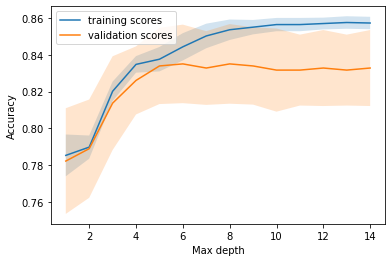

In [64]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )


plot_with_err(max_depth, val_train, label="training scores")
plot_with_err(max_depth, val_test, label="validation scores")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend();

## n_estimators

In [65]:
n_estimators = np.arange(100, 2100, 100)
rf_clf = RandomForestClassifier(max_depth=8, 
                                min_samples_split=8,
                                min_samples_leaf=3,
                                max_features='sqrt',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)

val_train, val_test = validation_curve(estimator=rf_clf, 
                                       X=X, 
                                       y=y, 
                                       param_name='n_estimators',
                                       param_range=n_estimators, 
                                       cv=skf, 
                                       scoring='accuracy')

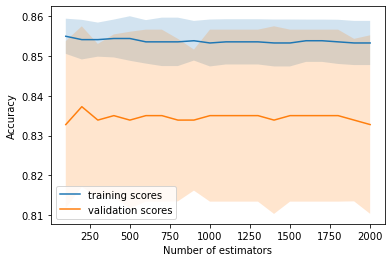

In [66]:
plot_with_err(n_estimators, val_train, label="training scores")
plot_with_err(n_estimators, val_test, label="validation scores")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend();

## min_samples_split

In [67]:
min_samples_split = np.arange(2, 20)
rf_clf = RandomForestClassifier(n_estimators=1750, 
                                max_depth=8,
                                min_samples_leaf=3,
                                max_features='sqrt',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)

val_train, val_test = validation_curve(estimator=rf_clf, 
                                       X=X, 
                                       y=y, 
                                       param_name='min_samples_split',
                                       param_range=min_samples_split, 
                                       cv=skf, 
                                       scoring='accuracy')

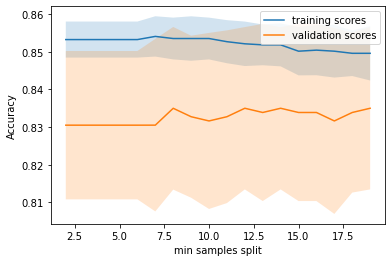

In [68]:
plot_with_err(min_samples_split, val_train, label="training scores")
plot_with_err(min_samples_split, val_test, label="validation scores")
plt.xlabel("min samples split")
plt.ylabel("Accuracy")
plt.legend();

## min_samples_leaf

In [69]:
min_samples_leaf = np.arange(1, 20)
rf_clf = RandomForestClassifier(n_estimators=1750, 
                                max_depth=8,
                                min_samples_split=8,
                                max_features='sqrt',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)

val_train, val_test = validation_curve(estimator=rf_clf, 
                                       X=X, 
                                       y=y, 
                                       param_name='min_samples_leaf',
                                       param_range=min_samples_leaf, 
                                       cv=skf, 
                                       scoring='accuracy')

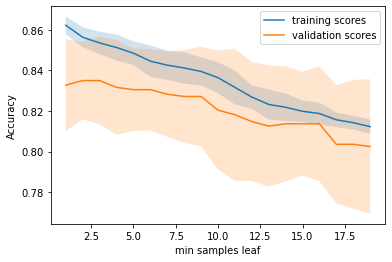

In [70]:
plot_with_err(min_samples_leaf, val_train, label="training scores")
plot_with_err(min_samples_leaf, val_test, label="validation scores")
plt.xlabel("min samples leaf")
plt.ylabel("Accuracy")
plt.legend();

## Tuninig model

In [82]:
rf_tunned = RandomForestClassifier(n_estimators=1750,
                                   max_depth=5,
                                   min_samples_split=8,
                                   min_samples_leaf=3,
                                   n_jobs=-1,
                                   random_state=RANDOM_STATE)
for trn_idx, _ in skf.split(X, y):
    rf_tunned.fit(X.iloc[trn_idx], y.iloc[trn_idx])

In [83]:
print('Accuracy for tuned random forest estimator:', accuracy_score(y, rf_tunned.predict(X)))

Accuracy for tuned random forest estimator: 0.8372615039281706


In [84]:
test_pred = rf_tunned.predict(test)
pd.Series(test_pred, index=passenger_id, name='Survived') \
    .to_csv('rf_tuned.csv', header=True, index_label='PassengerId')

**Public score**: 0.78468